In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sys

In [2]:
data = pd.read_csv('googleplaystore/googleplaystoremaster.csv') #fetches data from googleplaystore folder

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape #fetches number of rows and columns

(10841, 13)

In [5]:
data.dtypes #reports data types, all are strings except Rating which is a float

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
data.columns #fetch column names

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#we only need app name, category, type, and price for analysis so drop the others
data = data.drop(['Rating', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1) 

In [43]:
data.head()

,App,Category,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,0.0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,Free,0.0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,0.0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,0.0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,0.0,Art & Design;Creativity


In [90]:
data['Category'].unique() # view unique values in Category column

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [72]:
#client only wants Entertainment, Social, and Productivity so I drop the rest
cleaned=data[data["Category"].str.contains('ART_AND_DESIGN|AUTO_AND_VEHICLES|BEAUTY|BOOKS_AND_REFERENCE|BUSINESS|COMICS|COMMUNICATION|DATING|EDUCATION|EVENTS|FINANCE|FOOD_AND_DRINK|HEALTH_AND_FITNESS|HOUSE_AND_HOME|LIBRARIES_AND_DEMO|LIFESTYLE|GAME|FAMILY|MEDICAL|SHOPPING|PHOTOGRAPHY|SPORTS|TRAVEL_AND_LOCAL|TOOLS|PERSONALIZATION|PARENTING||WEATHER|VIDEO_PLAYERS|NEWS_AND_MAGAZINES|MAPS_AND_NAVIGATION|1.9')==False]

In [94]:
#client only wants Entertainment, Social, and Productivity so I drop the rest
cleaned=(data[data['Category'].str.contains('ENTERTAINMENT') | data['Category'].str.contains('SOCIAL') | data['Category'].str.contains('PRODUCTIVITY')])

In [95]:
cleaned.head() #checks the above to make sure it worked

,App,Category,Type,Price,Genres
855,Netflix,ENTERTAINMENT,Free,0.0,Entertainment
856,Complete Spanish Movies,ENTERTAINMENT,Free,0.0,Entertainment
857,Pluto TV - It’s Free TV,ENTERTAINMENT,Free,0.0,Entertainment
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,Free,0.0,Entertainment
859,YouTube Kids,ENTERTAINMENT,Free,0.0,Entertainment;Music & Video


In [100]:
free = cleaned.loc[((cleaned['Type'] == 'Free'))] # isolate the free apps

In [101]:
free.count() # find total number of free apps

App         835
Category    835
Type        835
Price       835
Genres      835
dtype: int64

In [97]:
paid=cleaned.loc[((cleaned['Type'] == 'Paid'))] # isolate the paid apps

In [98]:
paid.count() #find total number of paid apps

App         33
Category    33
Type        33
Price       33
Genres      33
dtype: int64

In [102]:
freeCategory=free['Category'].value_counts() #get a count of free apps for each category
print(freeCategory)

Category
PRODUCTIVITY     396
SOCIAL           292
ENTERTAINMENT    147
Name: count, dtype: int64


In [99]:
paidCategory=paid['Category'].value_counts() #get a count of paid apps for each category

print(paidCategory)

Category
PRODUCTIVITY     28
SOCIAL            3
ENTERTAINMENT     2
Name: count, dtype: int64


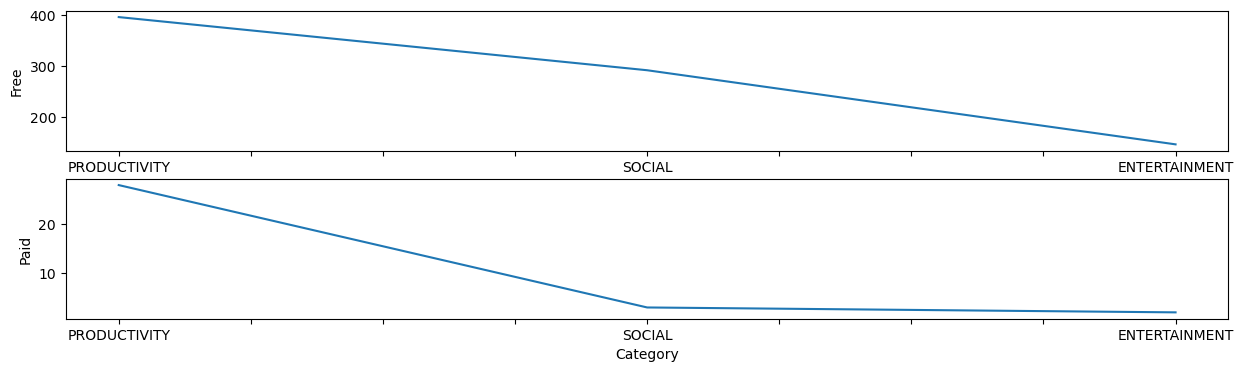

In [103]:
#create charts
plt.subplot(2,1,1) #creates a plot that can stack 2 rows on 1 column. the 3rd number is its  position in the stack
freeCategory.plot(figsize=(15,5))
plt.ylabel("Free")
plt.subplot(2,1,2) #creates a plot that can stack 2 rows on 1 column. the 3rd number is its position in the stack
paidCategory.plot(figsize=(15,4))
plt.ylabel("Paid")
plt.show()

In [104]:
paid.count()

App         33
Category    33
Type        33
Price       33
Genres      33
dtype: int64

In [105]:
paidCategory=paid['Category'].value_counts() #get a count of paid apps for each category
print(paidCategory)

Category
PRODUCTIVITY     28
SOCIAL            3
ENTERTAINMENT     2
Name: count, dtype: int64


In [39]:
#convert price to string
data['Price'] = data['Price'].astype(str)

In [40]:
#remove the $ from the Price column
data['Price']=data['Price'].str.replace('\$', '', regex=True)

In [41]:
data['Price']=pd.to_numeric(data['Price'], errors='coerce').fillna(0, downcast='infer') #convert price to a numeric value

C:\Users\augus\AppData\Local\Temp\ipykernel_14940\476014233.py:1: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  data['Price']=pd.to_numeric(data['Price'], errors='coerce').fillna(0, downcast='infer') #convert price to a numeric value


In [106]:
data.dtypes #checks whether the above worked - price now shows as Float so it did

App          object
Category     object
Type         object
Price       float64
Genres       object
dtype: object

In [107]:
paid.head()

,App,Category,Type,Price,Genres
995,My Talking Pet,ENTERTAINMENT,Paid,4.99,Entertainment
1001,Meme Generator,ENTERTAINMENT,Paid,2.99,Entertainment
3564,aCalendar+ Calendar & Tasks,PRODUCTIVITY,Paid,5.99,Productivity
4165,Ramfer - CNC Lathe G-code Tool,PRODUCTIVITY,Paid,2.99,Productivity
4358,m>notes notepad,PRODUCTIVITY,Paid,2.99,Productivity


In [108]:
#Sort the data in descending order
sorted=paid.sort_values(by='Price', ascending=False)

In [120]:
#Show top 5 paid apps
sorted.head()

,App,Category,Type,Price,Genres
6692,cronometra-br,PRODUCTIVITY,Paid,154.99,Productivity
5307,Ak Parti Yardım Toplama,SOCIAL,Paid,13.99,Social
8211,ACCDB MDB DB Manager Pro - Editor for MS Access,PRODUCTIVITY,Paid,8.99,Productivity
8616,MC.Fitting,PRODUCTIVITY,Paid,8.49,Productivity
10450,Police Field Interview FI Card,PRODUCTIVITY,Paid,7.99,Productivity


In [111]:
sorted.tail() #shows bottom 5 paid apps

,App,Category,Type,Price,Genres
8359,Diseño de columnas NTC - RSEE 2017,PRODUCTIVITY,Paid,0.99,Productivity
8526,DL Image Manager,PRODUCTIVITY,Paid,0.99,Productivity
4721,W-History Standalone,SOCIAL,Paid,0.99,Social
6292,BI Barcode Scanner,PRODUCTIVITY,Paid,0.99,Productivity
4971,WhatsFake Pro (Ad free),SOCIAL,Paid,0.99,Social


In [112]:
topPaid = sorted.groupby(by='Category', axis=0, level=None, as_index=True, sort=True, group_keys=True)

C:\Users\augus\AppData\Local\Temp\ipykernel_14940\3577696564.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  topPaid = sorted.groupby(by='Category', axis=0, level=None, as_index=True, sort=True, group_keys=True)


In [113]:
#Shows highest priced app in each category
topPaid.first() 

,App,Type,Price,Genres
Category,,,,
ENTERTAINMENT,My Talking Pet,Paid,4.99,Entertainment
PRODUCTIVITY,cronometra-br,Paid,154.99,Productivity
SOCIAL,Ak Parti Yardım Toplama,Paid,13.99,Social


In [116]:
#Shows lowest priced app in each category
topPaid.last()

,App,Type,Price,Genres
Category,,,,
ENTERTAINMENT,Meme Generator,Paid,2.99,Entertainment
PRODUCTIVITY,BI Barcode Scanner,Paid,0.99,Productivity
SOCIAL,WhatsFake Pro (Ad free),Paid,0.99,Social
